In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('another_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

id


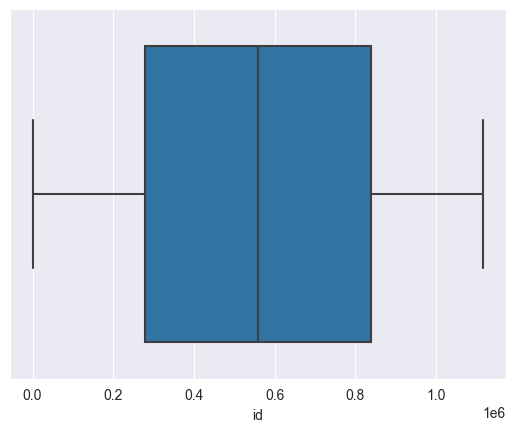

MonsoonIntensity


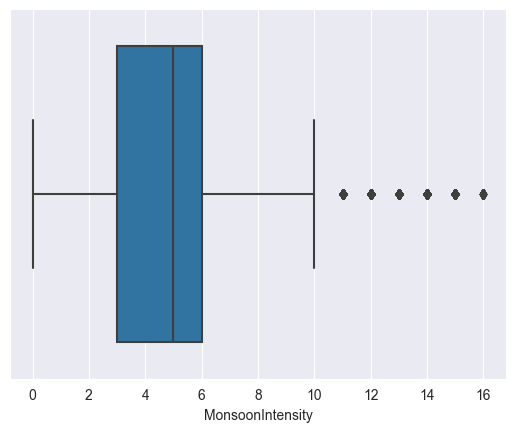

TopographyDrainage


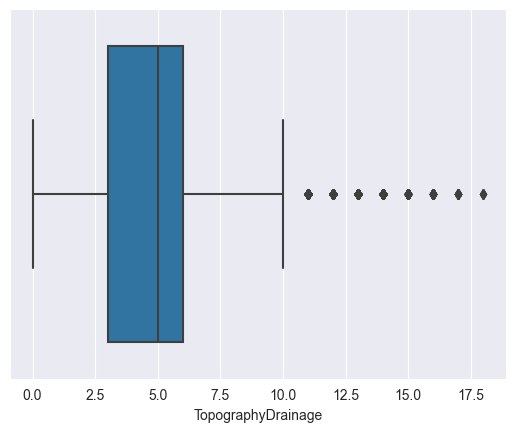

RiverManagement


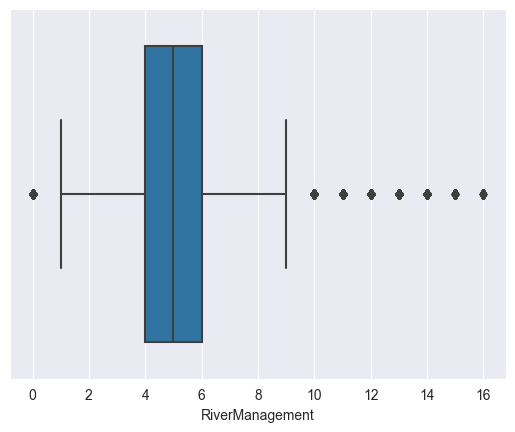

Deforestation


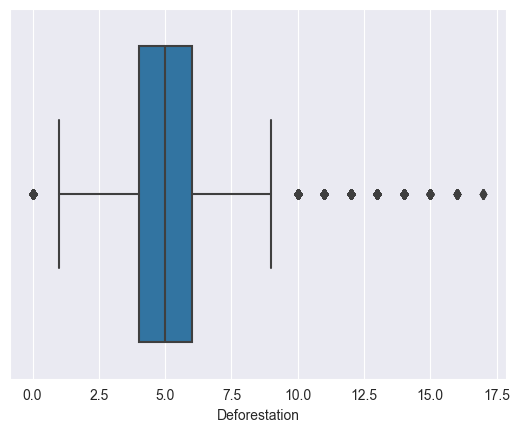

Urbanization


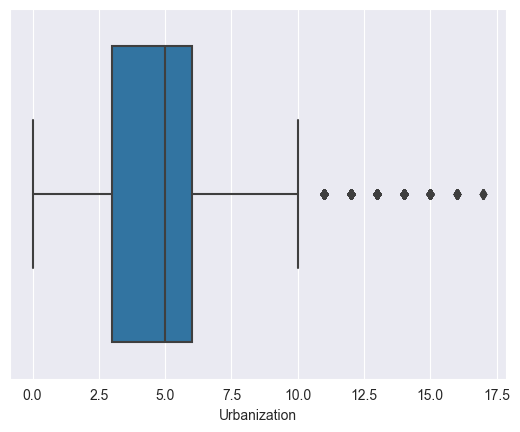

ClimateChange


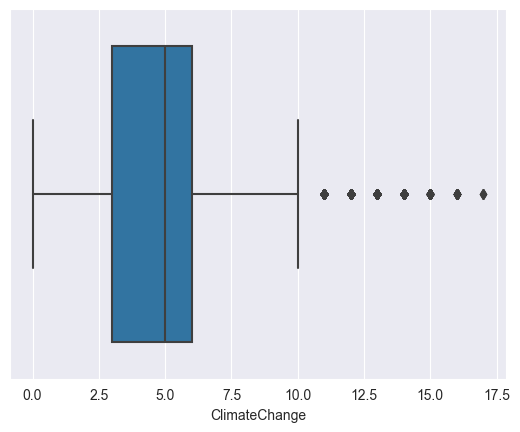

DamsQuality


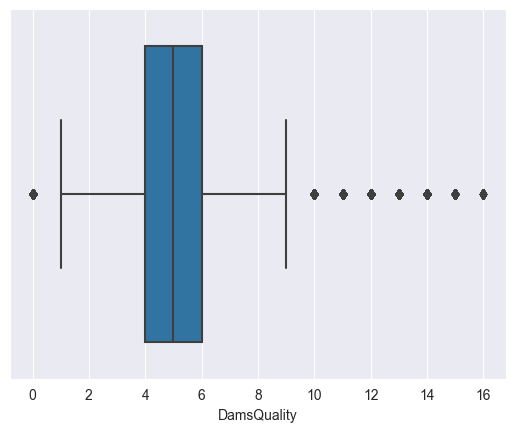

Siltation


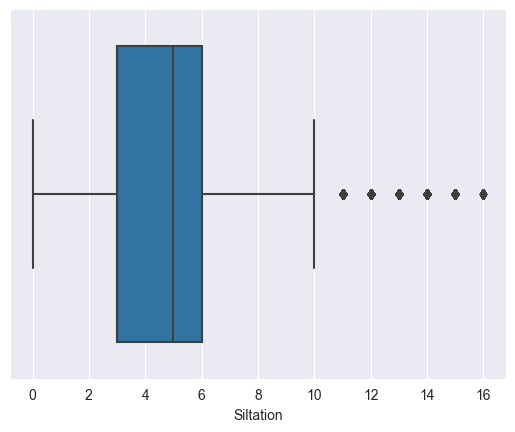

AgriculturalPractices


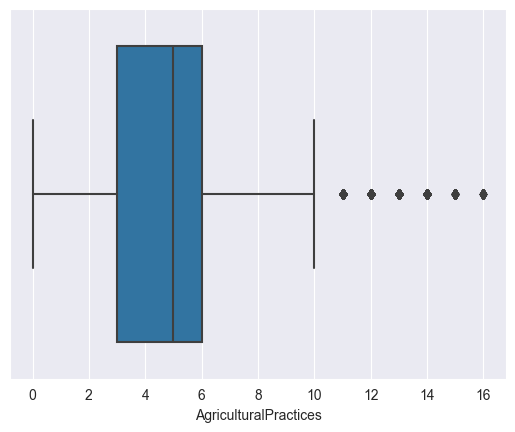

Encroachments


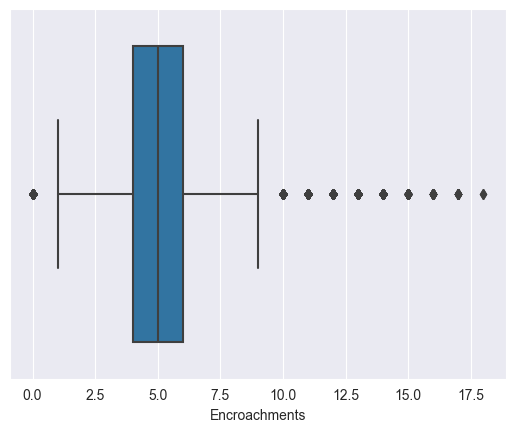

IneffectiveDisasterPreparedness


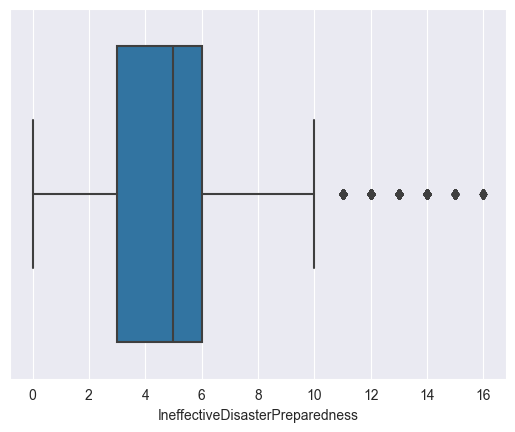

DrainageSystems


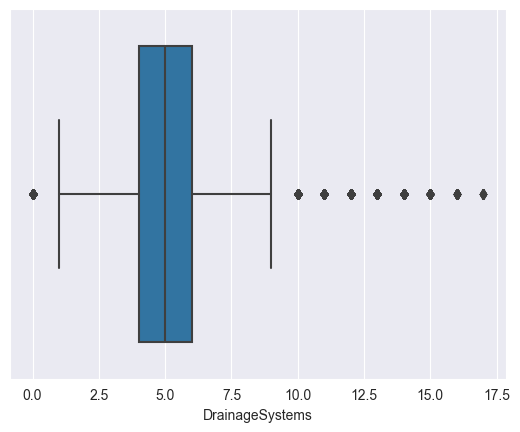

CoastalVulnerability


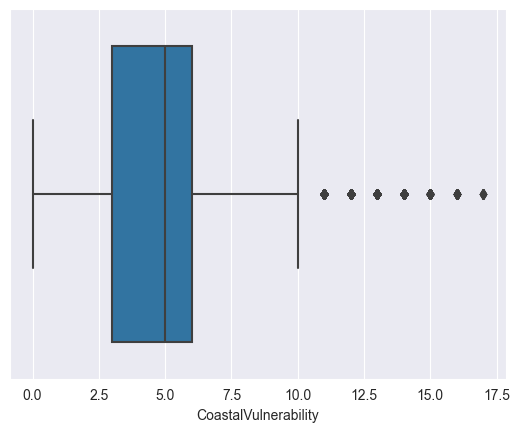

Landslides


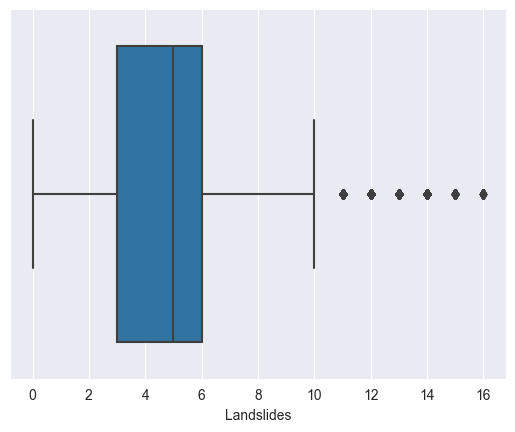

Watersheds


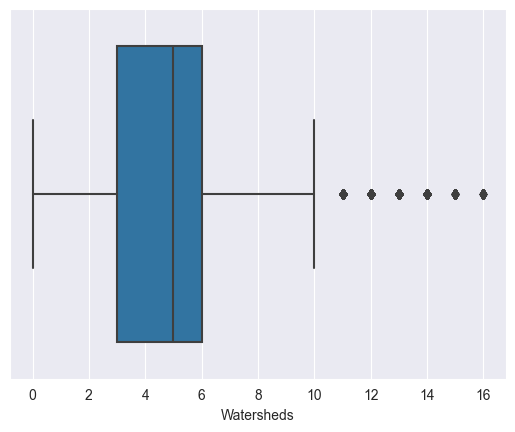

DeterioratingInfrastructure


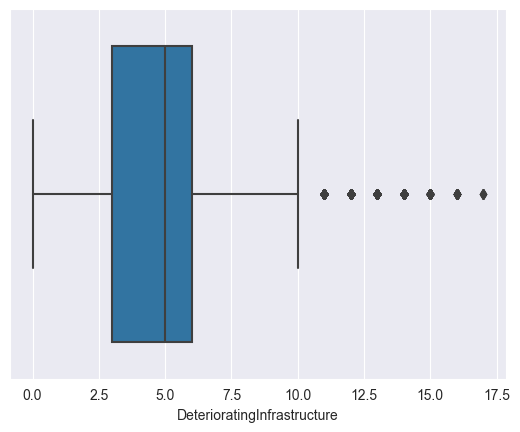

PopulationScore


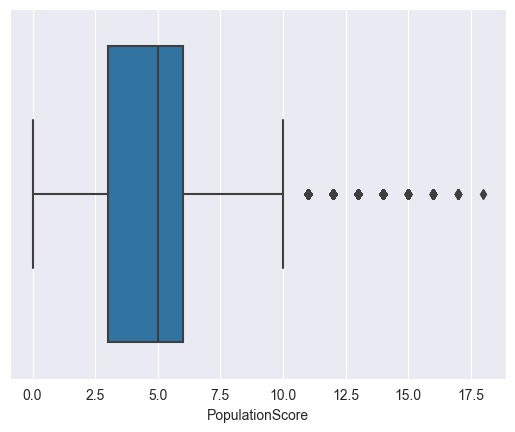

WetlandLoss


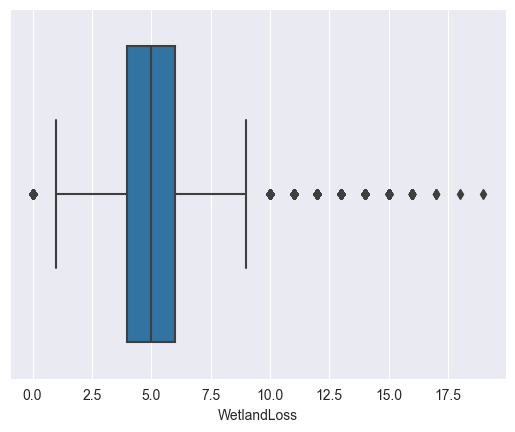

InadequatePlanning


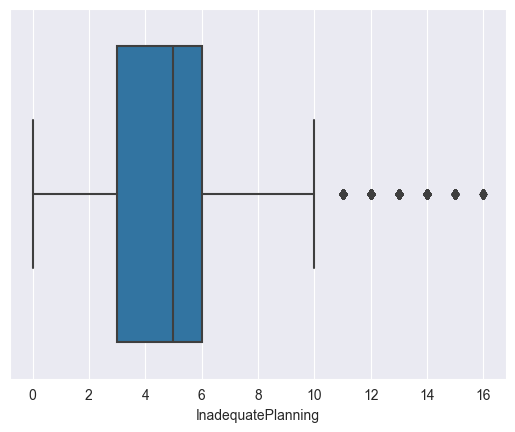

PoliticalFactors


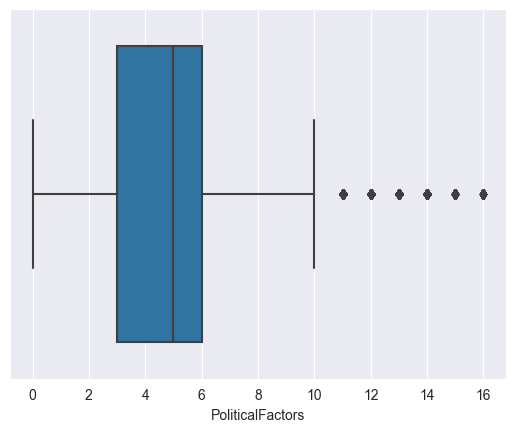

FloodProbability


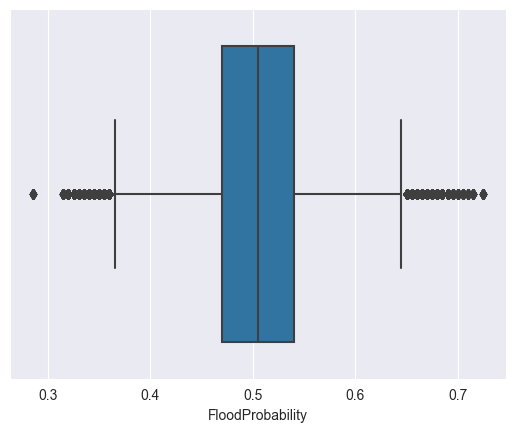

In [4]:
for column in df.columns :
    sns.boxplot(df, x=column)
    print(column)
    plt.show()

In [5]:
for column in df.columns :
    upper_limit = df[column].quantile(0.99)
    lower_limit = df[column].quantile(0.01)
    
    df[column] = np.where(
        df[column] < lower_limit,
        lower_limit,
        np.where(
            df[column] > upper_limit,
            upper_limit,
            df[column]
        )
    )
    

id


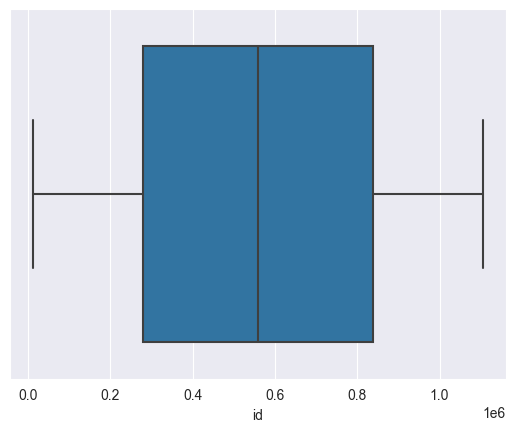

MonsoonIntensity


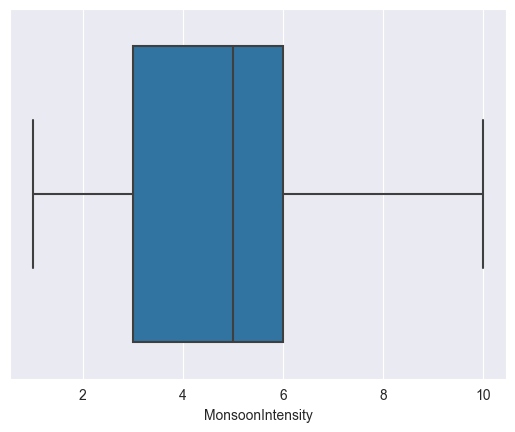

TopographyDrainage


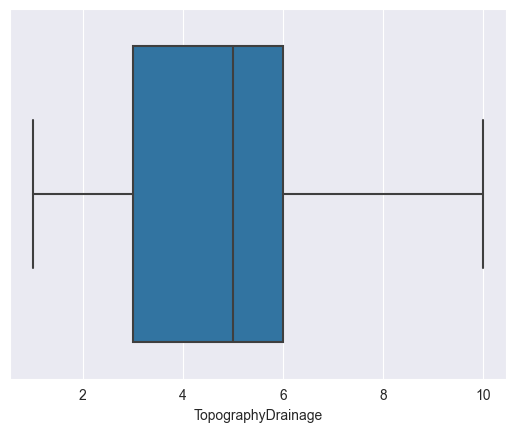

RiverManagement


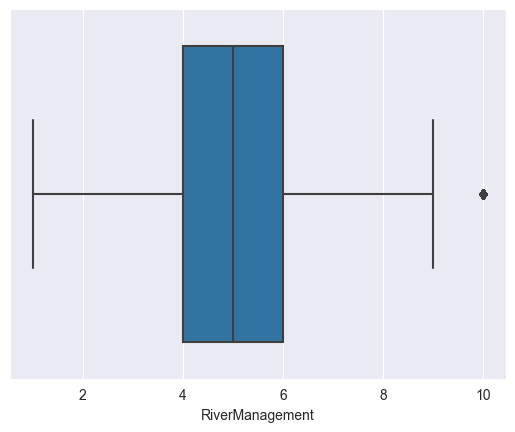

Deforestation


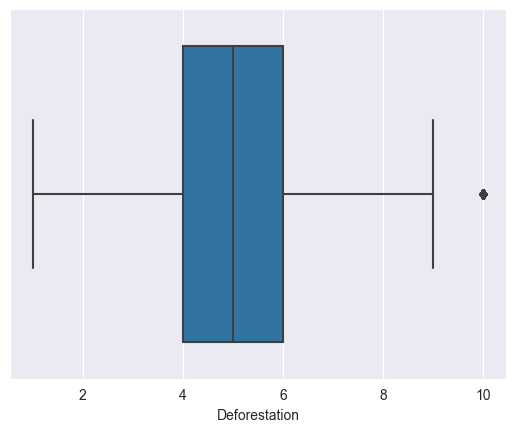

Urbanization


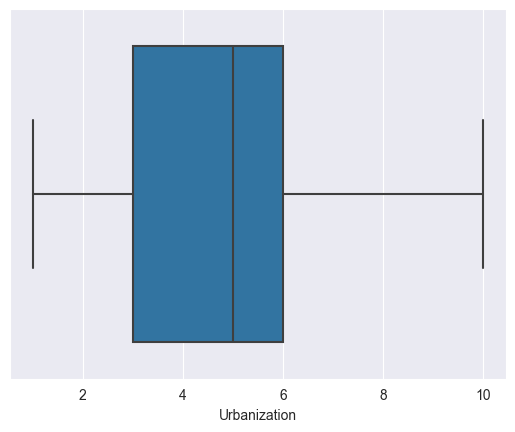

ClimateChange


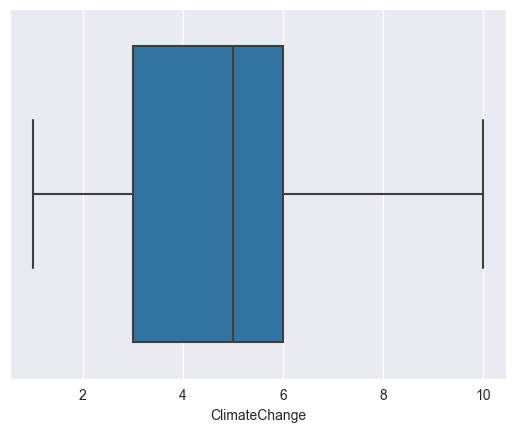

DamsQuality


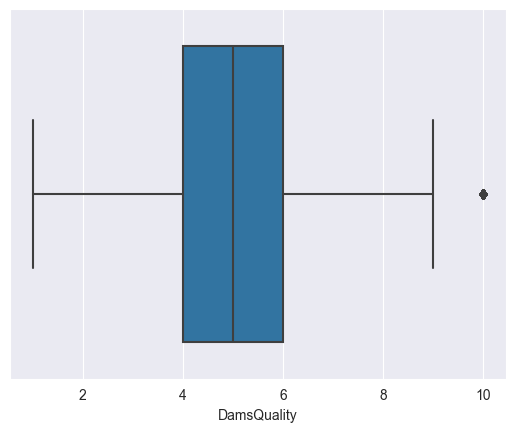

Siltation


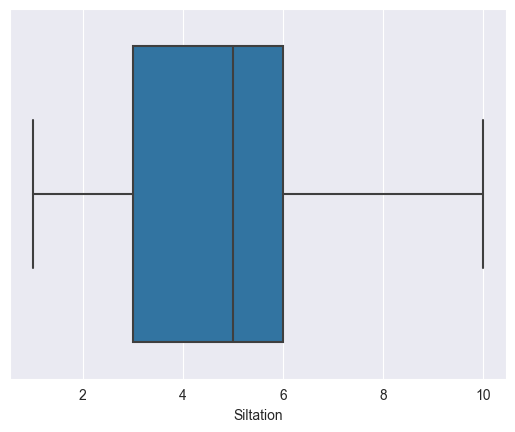

AgriculturalPractices


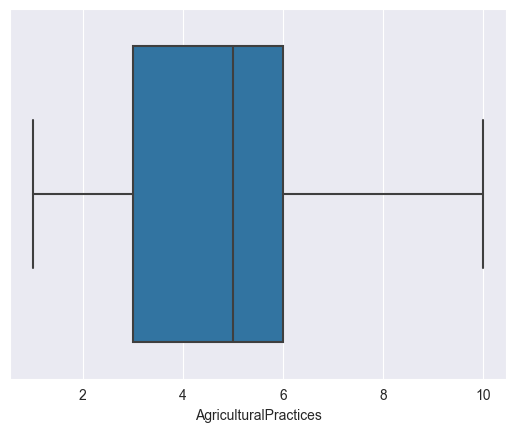

Encroachments


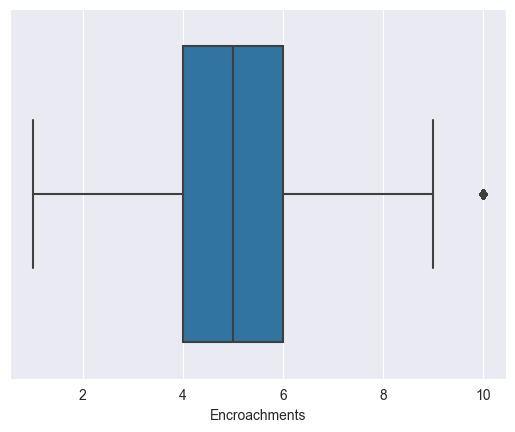

IneffectiveDisasterPreparedness


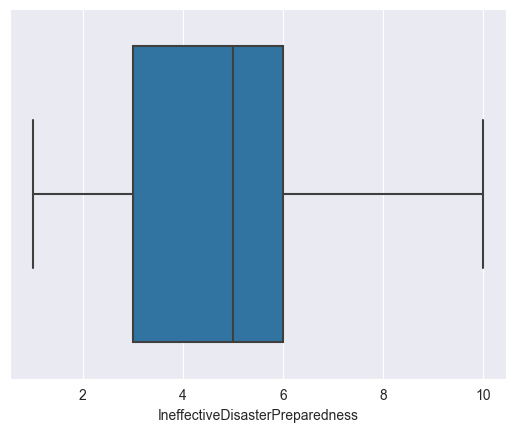

DrainageSystems


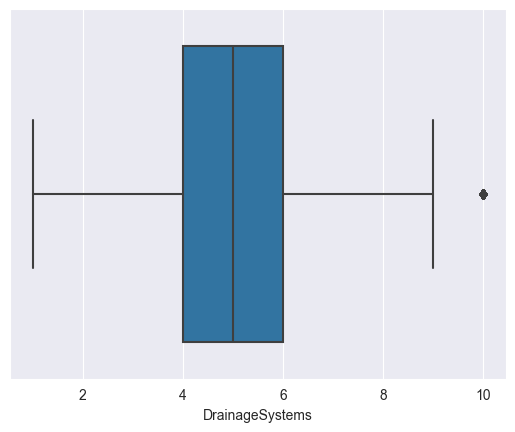

CoastalVulnerability


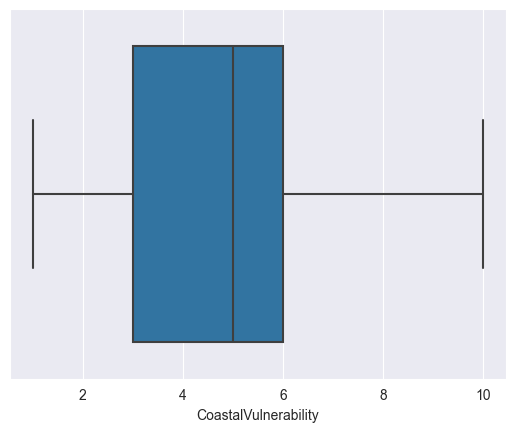

Landslides


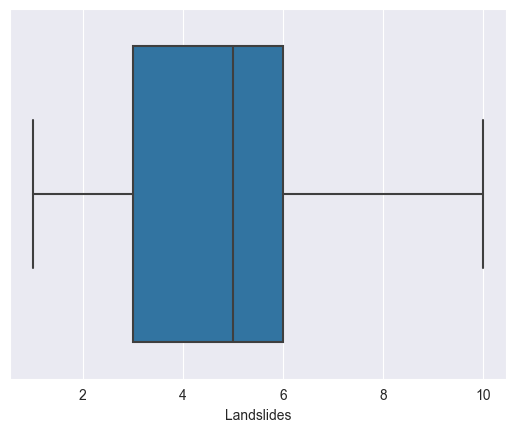

Watersheds


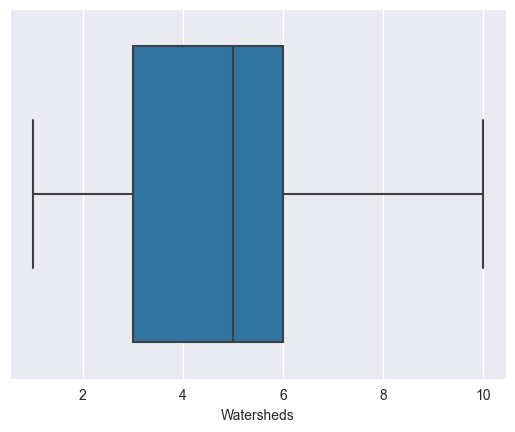

DeterioratingInfrastructure


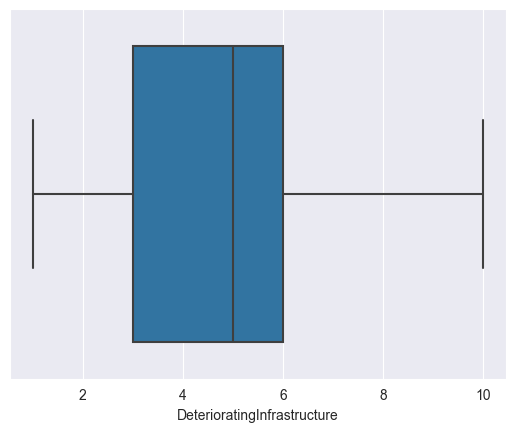

PopulationScore


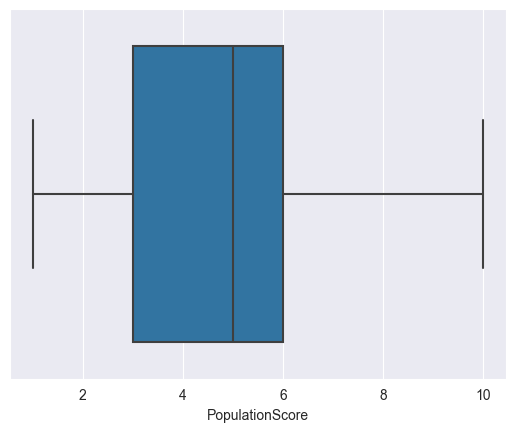

WetlandLoss


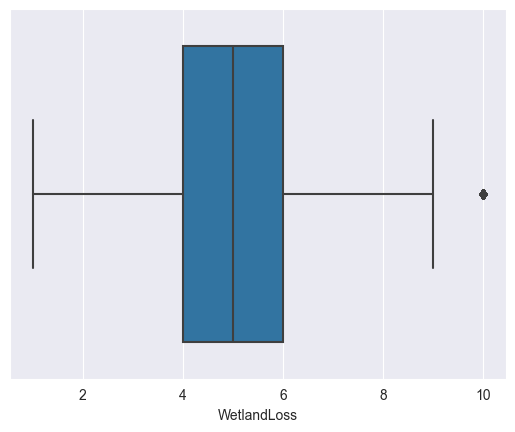

InadequatePlanning


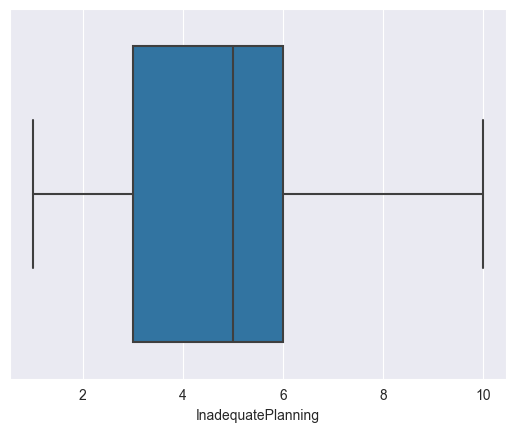

PoliticalFactors


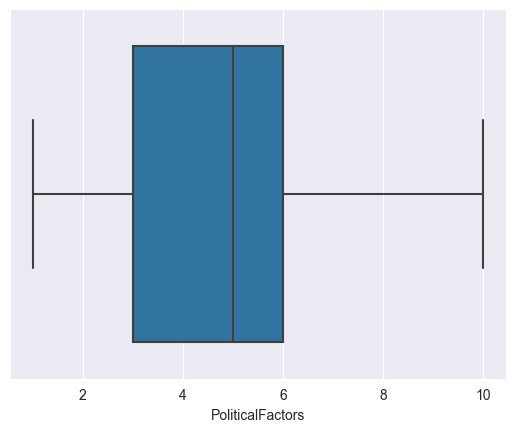

FloodProbability


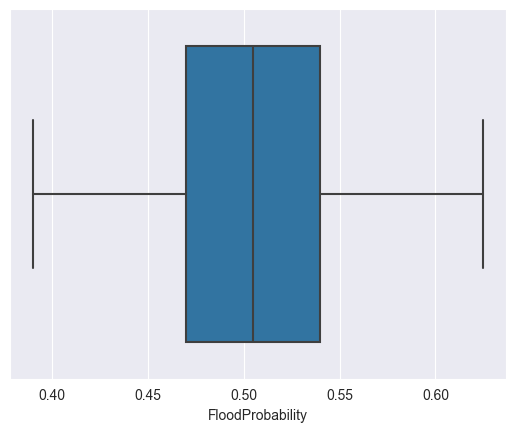

In [6]:
for column in df.columns :
    sns.boxplot(df, x=column)
    print(column)
    plt.show()

In [7]:
model = LinearRegression()

In [8]:
model.fit(df.drop(columns = ['FloodProbability']), df['FloodProbability'])

LinearRegression()

In [9]:
test_sample = pd.read_csv('test.csv')

In [10]:
test_sample.isnull().mean()

id                                 0.0
MonsoonIntensity                   0.0
TopographyDrainage                 0.0
RiverManagement                    0.0
Deforestation                      0.0
Urbanization                       0.0
ClimateChange                      0.0
DamsQuality                        0.0
Siltation                          0.0
AgriculturalPractices              0.0
Encroachments                      0.0
IneffectiveDisasterPreparedness    0.0
DrainageSystems                    0.0
CoastalVulnerability               0.0
Landslides                         0.0
Watersheds                         0.0
DeterioratingInfrastructure        0.0
PopulationScore                    0.0
WetlandLoss                        0.0
InadequatePlanning                 0.0
PoliticalFactors                   0.0
dtype: float64

In [11]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [12]:
y_pred = model.predict(test_sample)

In [13]:
len(y_pred)

745305

In [14]:
result = pd.DataFrame()

In [15]:
result['id'] = test_sample['id']

In [16]:
result['FloodProbability'] = y_pred

In [17]:
result.to_csv('Submission.csv', index=False)